Last modified: August 29th, 2025

## Oblique electrostatic waves
#### [V. Roytershteyn and G. L. Delzanno. *Nonlinear coupling of whistler waves to oblique electrostatic turbulence enabled by cold plasma*. Physics of Plasmas, 28(4):042903, 04 2021](https://pubs.aip.org/aip/pop/article-abstract/28/4/042903/263604/Nonlinear-coupling-of-whistler-waves-to-oblique?redirectedFrom=fulltext)

Author: Opal Issan (oissan@ucsd.edu)

In [291]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('../..')))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from QLT_equations.obliqueQLT import electron_response, ion_response, dispersion_relation
from QLT_equations.full_dispersion_oblique import THETA, D_matrix
from IPython.display import clear_output

In [3]:
%matplotlib inline
import matplotlib
font = {'family' : 'sans-serif',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

## Oblique electrostatic waves

In [4]:
# parameters from 2021 paper 
# normalization (Vadim parameters)
# time is normalized to the electron cyclotron frequency 1/Omega_ce
# space is normalized to electron inertial length d_e
omega_0 = 0.5 # Omega_ce
omega_pe = 4 # Omgea_{ce}

n_c = 0.8 # n^e_0

# thermal velocity 
alpha_c_par = 0.0079 # d_e x Omega_ce
alpha_c_perp = 0.0079 # d_e x Omega_ce
alpha_i =  alpha_c_par / np.sqrt(1836) # d_e x Omega_ce

v_0 = 0.65 * alpha_c_par # d_e x Omega_ce
omega_pi = omega_pe / np.sqrt(1836) # Omega_ce

In [5]:
def disp_k_approx(ky,
                  kz,
                  n_c_,
                  omega_pe_=omega_pe,
                  omega_pi_=omega_pi,
                  omega_0_=omega_0,
                  v_0_=v_0,
                  alpha_i_=alpha_i,
                  alpha_c_perp_=alpha_c_perp,
                  alpha_c_par_=alpha_c_par,
                  m_star=-1):
    return dispersion_relation(k_perp=ky, k_par=kz, omega_pe=omega_pe_, omega_pi=omega_pi_, omega_0=omega_0_, v_0=v_0_, alpha_i=alpha_i_,
                        alpha_c_par=alpha_c_par_, alpha_c_perp=alpha_c_perp_, n_c=n_c_, m_star=m_star, n_max=10)

def disp_k_full(ky,
                kz,
                n_c_,
                omega_pe_=omega_pe,
                omega_pi_=omega_pi,
                omega_0_=omega_0,
                v_0_=v_0,
                alpha_i_=alpha_i,
                alpha_c_perp_=alpha_c_perp,
                alpha_c_par_=alpha_c_par):
    return lambda omega: np.linalg.det(
        D_matrix(omega=omega, ky=ky, kz=kz, n_c_=n_c_, omega_pe_=omega_pe_, alpha_c_par_=alpha_c_par_,
                      alpha_c_perp_=alpha_c_perp_, omega_0_=omega_0_, v_0_=v_0_,
                      alpha_i_=alpha_i_, omega_pi_=omega_pi_))

In [6]:
ky_ = 11
kz_ = np.sqrt((omega_0 ** 2) / (1 - omega_0 ** 2)) * ky_
sol_approx = scipy.optimize.newton(disp_k_approx(ky=ky_, kz=kz_, n_c_=0.8), omega_0 + 1e-3j, tol=1e-15)
print(sol_approx)
print("omega_k + i gamma = ", sol_approx)
print("dispersion residual approx = ", abs(disp_k_approx(ky=ky_, kz=kz_, n_c_=0.8)(sol_approx)))

sol_full = scipy.optimize.newton(disp_k_full(ky=ky_, kz=kz_, n_c_=0.8), sol_approx, tol=1e-15, maxiter=100)
print(sol_full)
print("omega_k + i gamma = ", sol_full)
print("dispersion residual full = ", abs(disp_k_full(ky=ky_, kz=kz_, n_c_=0.8)(sol_full)))

(0.49133499455331203+0.003528395311648414j)
omega_k + i gamma =  (0.49133499455331203+0.003528395311648414j)
dispersion residual approx =  4.8328242560506193e-11
(0.49073850834347726+0.003918387838799899j)
omega_k + i gamma =  (0.49073850834347726+0.003918387838799899j)
dispersion residual full =  6.798741388716457e+22


In [7]:
ky_ = np.linspace(5, 70, 70)
kz_ = np.sqrt((omega_0 ** 2) / (1 - omega_0 ** 2)) * ky_

n_c_ = np.linspace(0.2, 0.95, 50)

sol_approx_ = np.zeros((len(ky_), len(n_c_)), dtype="complex128")
sol_full_ = np.zeros((len(ky_), len(n_c_)), dtype="complex128")
k_abs = np.zeros((len(ky_)))

In [287]:
for jj in range(len(n_c_)):
    for ii in range(len(ky_)):
        k_abs[ii] = np.sqrt(ky_[ii] ** 2 + kz_[ii] ** 2)
        
        # diagnosis after
        if 0< ii < len(ky_)-1 and 0 < jj < len(n_c_)-1:
            if sol_full_[ii, jj].imag < 0.006 and sol_full_[ii+1, jj].imag > 0.006:
                print("\nii=", ii)
                print("jj=", jj)
                print("sol_approx[ii-1, jj]=", sol_approx_[ii, jj])
                print("sol_full[ii-1, jj]=", sol_full_[ii, jj])
                try:
                    # if sol_approx_[ii-1, jj] == 0j and sol_approx_[ii, jj-1] == 0j:
                    #     sol_approx_[ii, jj] = scipy.optimize.newton(disp_k_approx(ky=ky_[ii], kz=kz_[ii], n_c_=n_c_[jj]), x0=omega_0*0.99 + 1e-3j, tol=1e-15, maxiter=100, x1=omega_0 + 1e-3j)
                    #     print("[1] fine dispersion residual approx = ", abs(disp_k_approx(ky=ky_[ii], kz=kz_[ii], n_c_=n_c_[jj])(sol_approx_[ii, jj])))
                    # elif sol_approx_[ii-1, jj] == 0j and sol_approx_[ii, jj-1] != 0j:
                    #     sol_approx_[ii, jj] = scipy.optimize.newton(disp_k_approx(ky=ky_[ii], kz=kz_[ii], n_c_=n_c_[jj]), x0=sol_approx_[ii, jj-1], tol=1e-15, maxiter=100, x1=omega_0 + 1e-3j)
                    #     print("[2] fine dispersion residual approx = ", abs(disp_k_approx(ky=ky_[ii], kz=kz_[ii], n_c_=n_c_[jj])(sol_approx_[ii, jj])))
                    # else:
                    #     sol_approx_[ii, jj] = scipy.optimize.newton(disp_k_approx(ky=ky_[ii], kz=kz_[ii], n_c_=n_c_[jj]), x0=sol_approx_[ii+1, jj], tol=1e-15, maxiter=100, x1=sol_approx_[ii+2, jj])
                    #     print("[3] fine dispersion residual approx = ", abs(disp_k_approx(ky=ky_[ii], kz=kz_[ii], n_c_=n_c_[jj])(sol_approx_[ii, jj])))
                    if sol_full_[ii-1, jj] == 0j and sol_full_[ii, jj-1] == 0j:
                        sol_full_[ii, jj] = scipy.optimize.newton(disp_k_full(ky=ky_[ii], kz=kz_[ii], n_c_=n_c_[jj]), x0=omega_0*0.99 + 1e-3j, tol=1e-15, maxiter=100,  x1=omega_0 + 1e-3j)
                        print("[1] fine dispersion residual full = ", abs(disp_k_full(ky=ky_[ii], kz=kz_[ii], n_c_=n_c_[jj])(sol_full_[ii, jj])))
                    elif sol_full_[ii-1, jj] == 0j and sol_full_[ii, jj-1] != 0j:
                        sol_full_[ii, jj] = scipy.optimize.newton(disp_k_full(ky=ky_[ii], kz=kz_[ii], n_c_=n_c_[jj]), x0=sol_full_[ii, jj+1], tol=1e-15, maxiter=100,  x1=omega_0 + 1e-3j)
                        print("[2] fine dispersion residual full = ", abs(disp_k_full(ky=ky_[ii], kz=kz_[ii], n_c_=n_c_[jj])(sol_full_[ii, jj])))
                    else:
                        sol_full_[ii, jj] = scipy.optimize.newton(disp_k_full(ky=ky_[ii], kz=kz_[ii], n_c_=n_c_[jj]), x0=sol_full_[ii+1, jj], tol=1e-15, maxiter=200,  x1=sol_full_[ii+1, jj])
                        print("[3] fine dispersion residual full = ", abs(disp_k_full(ky=ky_[ii], kz=kz_[ii], n_c_=n_c_[jj])(sol_full_[ii, jj])))
                except:
                    try: 
                        sol_full_[ii, jj] = scipy.optimize.newton(disp_k_full(ky=ky_[ii], kz=kz_[ii], n_c_=n_c_[jj]), x0=sol_full_[ii+1, jj], tol=1e-15, maxiter=200,  x1=sol_full_[ii, jj+1])
                        print("[4] fine dispersion residual full = ", abs(disp_k_full(ky=ky_[ii], kz=kz_[ii], n_c_=n_c_[jj])(sol_full_[ii, jj])))
                    except:
                        print("fail dispersion residual approx = ", abs(disp_k_approx(ky=ky_[ii], kz=kz_[ii], n_c_=n_c_[jj])(sol_approx_[ii, jj])))
                        print("fail dispersion residual full = ", abs(disp_k_full(ky=ky_[ii], kz=kz_[ii], n_c_=n_c_[jj])(sol_full_[ii, jj])))
                clear_output(wait=True)


ii= 20
jj= 48
sol_approx[ii-1, jj]= (0.4939405234834667+0.008739769391080855j)
sol_full[ii-1, jj]= (0.4999999999999979+0.004343391488302235j)
[4] fine dispersion residual full =  2.573068577091889e+29


In [288]:
np.save("../../data/dispersion/oblique_approx_nc.npy", sol_approx_)
np.save("../../data/dispersion/oblique_full_nc.npy", sol_full_)

In [289]:
sol_full_.imag[sol_full_.imag>0.02] = 0

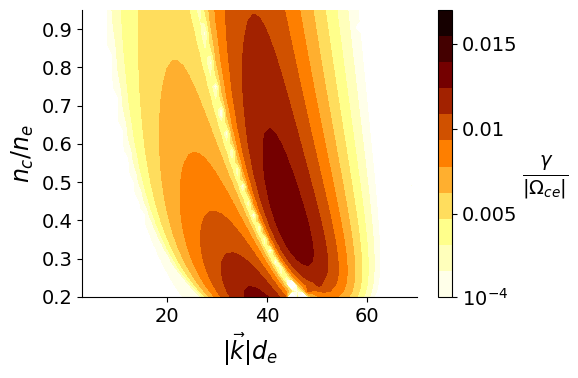

In [290]:
fig, ax = plt.subplots(figsize=(6, 4))
pos = ax.contourf(k_abs, n_c_, sol_full_.imag.T, vmin=1e-4, vmax=0.017, levels=np.linspace(1e-4, 0.017, 12), cmap="afmhot_r")

cbar = fig.colorbar(pos)
cbar.ax.set_ylabel(r'$\frac{\gamma}{|\Omega_{ce}|}$', labelpad=20, rotation=0, fontsize=20)
cbar.ax.set_yticks([1e-4, 0.005, 0.01, 0.015])
cbar.ax.set_yticklabels(["$10^{-4}$", "0.005", "0.01", "0.015"])

ax.set_xlabel(r"$|\vec{k}|d_{e}$", fontsize=17)
ax.set_ylabel("$n_{c}/n_{e}$", fontsize=17)
plt.tight_layout()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlim(3, 70)
ax.set_yticks([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.tight_layout()
plt.savefig("../../figs/manuscript/oblique_n_c_full_imag.png", dpi=300, bbox_inches='tight')

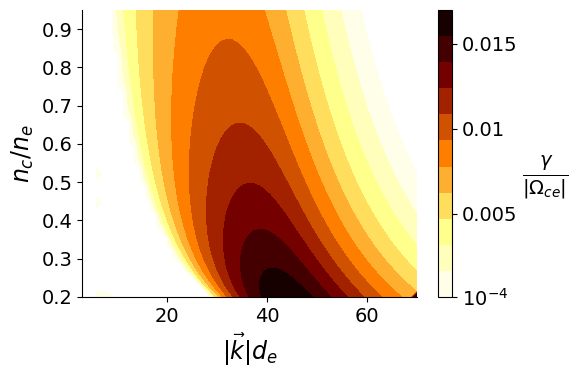

In [283]:
fig, ax = plt.subplots(figsize=(6, 4))
pos = ax.contourf(k_abs, n_c_, sol_approx_.imag.T, vmin=1e-4, vmax=0.017, levels=np.linspace(1e-4, 0.017, 12), cmap="afmhot_r")
cbar = fig.colorbar(pos)
cbar.ax.set_ylabel(r'$\frac{\gamma}{|\Omega_{ce}|}$', labelpad=20, rotation=0, fontsize=20)
cbar.ax.set_yticks([1e-4, 0.005, 0.01, 0.015])
cbar.ax.set_yticklabels(["$10^{-4}$", "0.005", "0.01", "0.015"])

ax.set_xlabel(r"$|\vec{k}|d_{e}$", fontsize=17)
ax.set_ylabel("$n_{c}/n_{e}$", fontsize=17)
plt.tight_layout()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlim(3, 70)
ax.set_yticks([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.tight_layout()
plt.savefig("../../figs/manuscript/oblique_n_c_approx_imag.png", dpi=300, bbox_inches='tight')

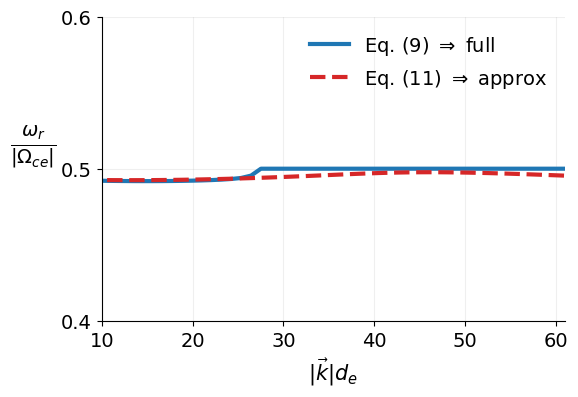

In [147]:
fig, ax = plt.subplots(figsize=(6, 4.2))
ax.plot(k_abs, sol_full_[:, -1].real, linewidth=3, color="tab:Blue", label="Eq. (9) $\Rightarrow$ full")
ax.plot(k_abs, sol_approx_[:, -1].real, linewidth=3, ls="--", color="tab:red", label="Eq. (11) $\Rightarrow$ approx")


ax.set_ylabel(r'$\frac{\omega_r}{|\Omega_{ce}|}$', fontsize=20, labelpad=20, rotation=0)
ax.set_xlabel(r"$|\vec{k}|d_{e}$", fontsize=15)

legend = ax.legend(ncols=1, fancybox=False, shadow=False,  loc="upper right")
legend.get_frame().set_alpha(0)

ax.set_ylim(0, 0.7)
ax.set_xlim(10, 61)
ax.set_ylim(0.4, 0.6)
ax.set_yticks([0.4, 0.5, 0.6])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(alpha=0.2)
plt.tight_layout()
#plt.savefig("../figs/vadim_2021/vadim_fig5_c.png", dpi=300, bbox_inches='tight')

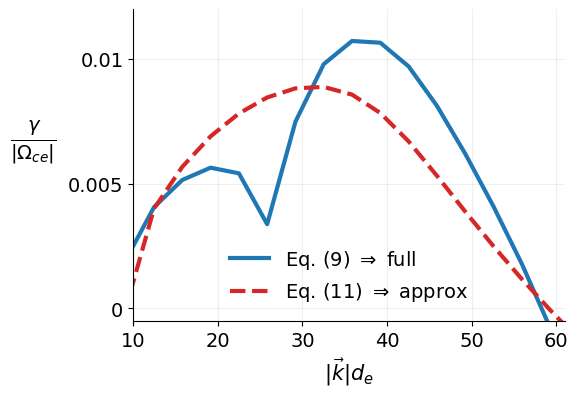

In [30]:
fig, ax = plt.subplots(figsize=(6, 4.2))
ax.plot(k_abs, sol_full_[:, -1].imag, linewidth=3, color="tab:Blue", label="Eq. (9) $\Rightarrow$ full")
ax.plot(k_abs, sol_approx_[:, -1].imag, linewidth=3, ls="--", color="tab:red", label="Eq. (11) $\Rightarrow$ approx")


ax.set_ylabel(r'$\frac{\gamma}{|\Omega_{ce}|}$', fontsize=20, labelpad=25, rotation=0)
ax.set_xlabel(r"$|\vec{k}|d_{e}$", fontsize=15)

legend = ax.legend(ncols=1, fancybox=False, shadow=False,  loc="lower center")
legend.get_frame().set_alpha(0)


ax.set_ylim(-0.0005, 0.012)
ax.set_yticks([0, 0.005, 0.01])
ax.set_yticklabels([0, 0.005, 0.01])
ax.set_xlim(10, 61)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(alpha=0.2)
plt.tight_layout()
#plt.savefig("../figs/vadim_2021/vadim_fig5_d.png", dpi=300, bbox_inches='tight')